# Task 3

### Name: Vihaan Shah

#### Prediction using Decision Tree Algorithm

For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically.

importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We will load the dataset

In [2]:
iris=pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We will visualize the data and use pairplots for this.

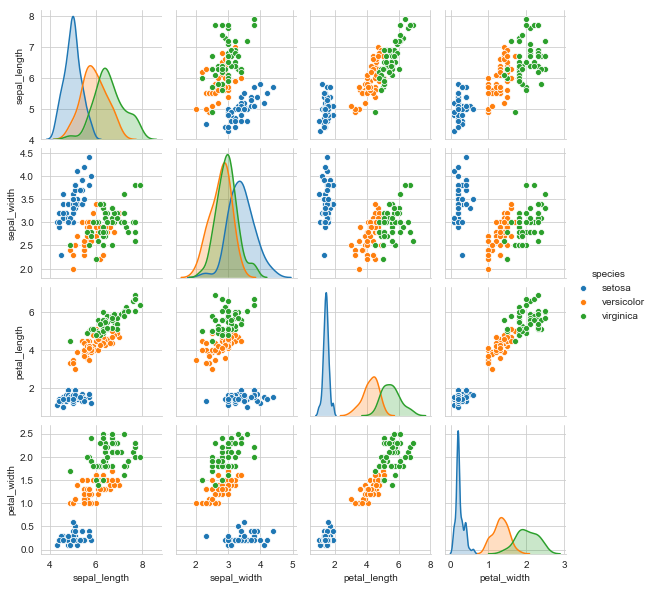

In [3]:
sns.set_style('whitegrid')
sns.pairplot(iris,hue='species',height=2)

Introducing Training and testing the data

In [4]:
from sklearn.model_selection import train_test_split
x= iris.drop('species',axis=1)
y= iris['species']
#To check

#print(y)
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3)

Introducing Decision Tree

In [5]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

We will perform prediction and then Evaluate

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
prediction=dtc.predict(x_test)
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       0.86      0.92      0.89        13
  virginica       0.93      0.88      0.90        16

avg / total       0.94      0.93      0.93        45



In [7]:
print(confusion_matrix(y_test,prediction))

[[16  0  0]
 [ 0 12  1]
 [ 0  2 14]]


Decision Tree Visualization

In [8]:
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
features = list(iris.columns[1:])
features

['sepal_width', 'petal_length', 'petal_width', 'species']

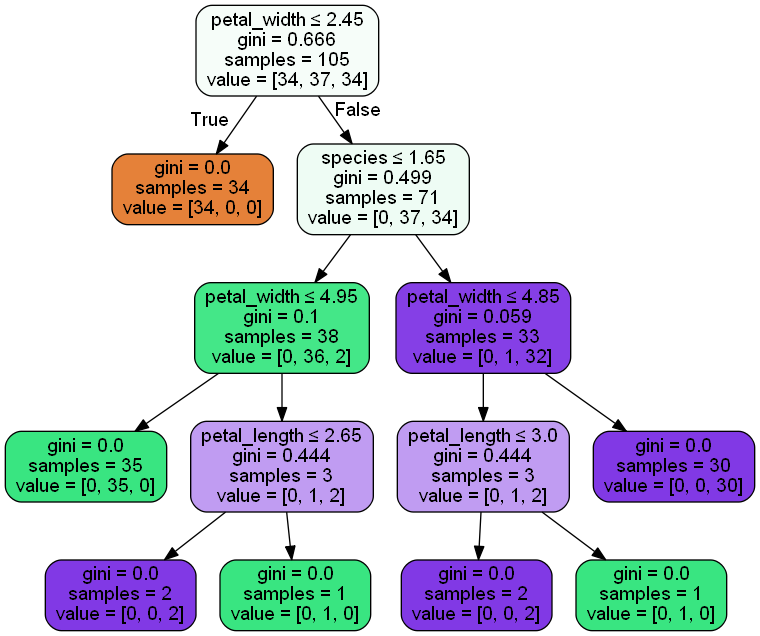

In [9]:
dot_data = StringIO()  
export_graphviz(dtc, out_file=dot_data,feature_names=features,filled=True,rounded=True,special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())